In [3]:
import pandas as pd

df = pd.read_csv('./data/sabdab_nano_with_cdr_sequences.csv')
df.head()


,pdb,Hchain,Lchain,model,antigen_chain,antigen_type,antigen_het_name,antigen_name,short_header,date,...,affinity,delta_g,affinity_method,temperature,pmid,seq,CDR_H1,CDR_H2,CDR_H3,CDR_concat
0,8zer,A,NaN,0,C,protein,NaN,spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,NaN,NaN,NaN,NaN,VQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKEREF...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD
1,8zer,D,NaN,0,I,protein,NaN,spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,NaN,NaN,NaN,NaN,VQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKEREF...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD
2,8zer,F,NaN,0,B | E,protein | protein,NA | NA,spike protein s1 | spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,NaN,NaN,NaN,NaN,VQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKEREF...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD
3,8zer,H,NaN,0,G,protein,NaN,spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,NaN,NaN,NaN,NaN,EVQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKERE...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD
4,8zer,J,NaN,0,I,protein,NaN,spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,NaN,NaN,NaN,NaN,VQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKEREF...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD


In [7]:
with open('./data/sabdab_cdr_seqs.fasta', 'w+') as f:
  for index, row in df[df['CDR_concat'].notna()].iterrows():
    pdb = row['pdb']
    chain = row['Hchain']
    seq = row['CDR_concat']

    f.writelines(f">{pdb}_{chain}\n")
    f.writelines(f"{seq}\n")


In [23]:
cluster_df = pd.read_csv('./data/mmseqs-out/clusterRes_cluster.tsv', sep='\t', header=None, names=['cluster-representative','cluster-member'])

cluster_df.head()

,cluster-representative,cluster-member
0,9fzc_D,9fzc_D
1,9fzc_D,9fzc_C
2,9fzd_B,9fzd_B
3,9g2a_D,9g2a_D
4,9g2a_D,9g2a_C


In [24]:
cluster_counts = cluster_df.groupby('cluster-representative').size()
cluster_counts.mean()

3.8144078144078146

In [25]:
cluster_df['cluster-representative'].nunique()

819

In [32]:
cluster_df[cluster_df['cluster-member'] == '9fzd_B']['cluster-representative']

2    9fzd_B
Name: cluster-representative, dtype: object

In [33]:
df['key'] = df['pdb'] + '_' + df['Hchain']
df.head()

,pdb,Hchain,Lchain,model,antigen_chain,antigen_type,antigen_het_name,antigen_name,short_header,date,...,delta_g,affinity_method,temperature,pmid,seq,CDR_H1,CDR_H2,CDR_H3,CDR_concat,key
0,8zer,A,NaN,0,C,protein,NaN,spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,NaN,NaN,NaN,VQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKEREF...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD,8zer_A
1,8zer,D,NaN,0,I,protein,NaN,spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,NaN,NaN,NaN,VQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKEREF...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD,8zer_D
2,8zer,F,NaN,0,B | E,protein | protein,NA | NA,spike protein s1 | spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,NaN,NaN,NaN,VQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKEREF...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD,8zer_F
3,8zer,H,NaN,0,G,protein,NaN,spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,NaN,NaN,NaN,EVQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKERE...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD,8zer_H
4,8zer,J,NaN,0,I,protein,NaN,spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,NaN,NaN,NaN,VQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKEREF...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD,8zer_J


In [34]:
cluster_df.head()

,cluster-representative,cluster-member
0,9fzc_D,9fzc_D
1,9fzc_D,9fzc_C
2,9fzd_B,9fzd_B
3,9g2a_D,9g2a_D
4,9g2a_D,9g2a_C


In [36]:
merged_cluster_df = pd.merge(df, cluster_df, left_on='key', right_on='cluster-member', how='left')

In [37]:
merged_cluster_df['cluster-representative'].nunique()

819

In [38]:
merged_cluster_df['cluster-id'] = pd.factorize(merged_cluster_df['cluster-representative'])[0]

In [40]:
merged_cluster_df.head(30)

,pdb,Hchain,Lchain,model,antigen_chain,antigen_type,antigen_het_name,antigen_name,short_header,date,...,pmid,seq,CDR_H1,CDR_H2,CDR_H3,CDR_concat,key,cluster-representative,cluster-member,cluster-id
0,8zer,A,NaN,0,C,protein,NaN,spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,VQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKEREF...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD,8zer_A,8zer_A,8zer_A,0
1,8zer,D,NaN,0,I,protein,NaN,spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,VQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKEREF...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD,8zer_D,8zer_A,8zer_D,0
2,8zer,F,NaN,0,B | E,protein | protein,NA | NA,spike protein s1 | spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,VQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKEREF...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD,8zer_F,8zer_A,8zer_F,0
3,8zer,H,NaN,0,G,protein,NaN,spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,EVQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKERE...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD,8zer_H,8zer_A,8zer_H,0
4,8zer,J,NaN,0,I,protein,NaN,spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,VQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKEREF...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD,8zer_J,8zer_A,8zer_J,0
5,8zes,E,NaN,0,D,protein,NaN,spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,EVQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKERE...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD,8zes_E,8zer_A,8zes_E,0
6,8zes,B,NaN,0,C,protein,NaN,spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,EVQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKERE...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD,8zes_B,8zer_A,8zes_B,0
7,8zes,F,NaN,0,D,protein,NaN,spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,EVQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKERE...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD,8zes_F,8zer_A,8zes_F,0
8,8zes,H,NaN,0,A | G,protein | protein,NA | NA,spike protein s1 | spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,EVQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKERE...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD,8zes_H,8zer_A,8zes_H,0
9,8zes,J,NaN,0,I,protein,NaN,spike protein s1,VIRAL PROTEIN/IMMUNE SYSTEM,09/04/24,...,NaN,EVQLVESGGGSVQAGGSLRLSCVASGYTYCSYDMSWYRQAPGKERE...,GYTYCSY,RRDGS,WACSSGGD,GYTYCSYRRDGSWACSSGGD,8zes_J,8zer_A,8zes_J,0


In [45]:
merged_cluster_df[merged_cluster_df['cluster-id'] == 22]['CDR_concat']

73      GFTFSSYNGGGSWWVDSYDY
74      GFTFSSYNGGGSWWVDSYDY
1016    GFTFSNYNGGGSDRGLHYDY
1294    GFTFSSYNGGGSYQAAVHDY
1295    GFTFSSYNGGGSYQAAVHDY
Name: CDR_concat, dtype: object

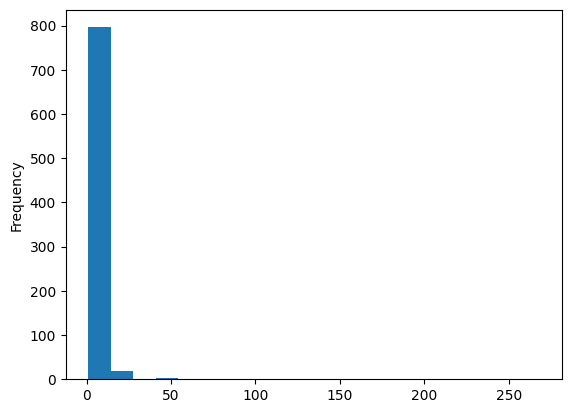

In [52]:
import matplotlib.pyplot as plt

cluster_counts = merged_cluster_df[merged_cluster_df['cluster-id'] != -1].groupby('cluster-id').size()
cluster_counts.plot(kind='hist', bins=20)

plt.show()

In [56]:
cluster_counts[cluster_counts > 20]

cluster-id
11     268
46      25
83      25
135     42
146     23
154     21
172     42
202     25
242     59
287     37
288     25
346     23
371     24
dtype: int64

In [58]:
merged_cluster_df[merged_cluster_df['cluster-id'] == 11]

,pdb,Hchain,Lchain,model,antigen_chain,antigen_type,antigen_het_name,antigen_name,short_header,date,...,pmid,seq,CDR_H1,CDR_H2,CDR_H3,CDR_concat,key,cluster-representative,cluster-member,cluster-id
33,8xve,N,NaN,0,A | B,protein | protein,NA | NA,isoform gnas-2 of guanine nucleotide-binding p...,SIGNALING PROTEIN,08/28/24,...,NaN,QVQLQESGGGLVQPGGSLRLSCAASGFTFSNYKMNWVRQAPGKGLE...,GFTFSNY,SSGAS,CPAPFTAY,GFTFSNYSSGASCPAPFTAY,8xve_N,8xve_N,8xve_N,11
34,8xvh,N,NaN,0,A | B,protein | protein,NA | NA,isoform gnas-2 of guanine nucleotide-binding p...,SIGNALING PROTEIN,08/28/24,...,NaN,QVQLQESGGGLVQPGGSLRLSCAASGFTFSNYKMNWVRQAPGKGLE...,GFTFSNY,SSGAS,CPAPFTAY,GFTFSNYSSGASCPAPFTAY,8xvh_N,8xve_N,8xvh_N,11
35,8xvi,N,NaN,0,A | B,protein | protein,NA | NA,isoform gnas-2 of guanine nucleotide-binding p...,SIGNALING PROTEIN,08/28/24,...,NaN,QVQLQESGGGLVQPGGSLRLSCAASGFTFSNYKMNWVRQAPGKGLE...,GFTFSNY,SSGAS,CPAPFTAY,GFTFSNYSSGASCPAPFTAY,8xvi_N,8xve_N,8xvi_N,11
45,8yw5,N,NaN,0,A | B,protein | protein,NA | NA,guanine nucleotide-binding protein g(s) subuni...,STRUCTURAL PROTEIN,08/07/24,...,NaN,QVQLQESGGGLVQPGGSLRLSCAASGFTFSNYKMNWVRQAPGKGLE...,GFTFSNY,SSGAS,CPAPFTAY,GFTFSNYSSGASCPAPFTAY,8yw5_N,8xve_N,8yw5_N,11
57,8zsj,N,NaN,0,A | B,protein | protein,NA | NA,guanine nucleotide-binding protein g(s) subuni...,MEMBRANE PROTEIN/IMMUNE SYSTEM,07/24/24,...,NaN,QVQLQESGGGLVQPGGSLRLSCAASGFTFSNYKMNWVRQAPGKGLE...,GFTFSNY,SSGAS,CPAPFTAY,GFTFSNYSSGASCPAPFTAY,8zsj_N,8xve_N,8zsj_N,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,6uun,N,NaN,0,A | B,protein | protein,NA | NA,guanine nucleotide-binding protein g(s) subuni...,MEMBRANE PROTEIN,10/30/19,...,NaN,QVQLQESGGGLVQPGGSLRLSCAASGFTFSNYKMNWVRQAPGKGLE...,GFTFSNY,SSGAS,CPAPFTAY,GFTFSNYSSGASCPAPFTAY,6uun_N,8xve_N,6uun_N,11
3310,7dhi,N,NaN,0,A | B,protein | protein,NA | NA,guanine nucleotide-binding protein g(s) subuni...,SIGNALING PROTEIN,11/15/20,...,NaN,QVQLQESGGGLVQPGGSLRLSCAASGFTFSNYKMNWVRQAPGKGLE...,GFTFSNY,SSGAS,CPAPFTAY,GFTFSNYSSGASCPAPFTAY,7dhi_N,8xve_N,7dhi_N,11
3311,6nbi,N,NaN,0,A | B,protein | protein,NA | NA,gs protein alpha subunit | guanine nucleotide-...,SIGNALING PROTEIN,12/07/18,...,NaN,QVQLQESGGGLVQPGGSLRLSCAASGFTFSNYKMNWVRQAPGKGLE...,GFTFSNY,SSGAS,CPAPFTAY,GFTFSNYSSGASCPAPFTAY,6nbi_N,8xve_N,6nbi_N,11
3312,7c2e,N,NaN,0,A | B,protein | protein,NA | NA,guanine nucleotide-binding protein g(s) subuni...,MEMBRANE PROTEIN,05/07/20,...,NaN,QVQLQESGGGLVQPGGSLRLSCAASGFTFSNYKMNWVRQAPGKGLE...,GFTFSNY,SSGAS,CPAPFTAY,GFTFSNYSSGASCPAPFTAY,7c2e_N,8xve_N,7c2e_N,11


In [60]:
merged_cluster_df.to_csv('./data/sabdab_nano_with_clusters.csv', index=False)